## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 3. Математика для нейронных сетей. Часть II 

### 1. Что вас ждёт в этом модуле?

⛏ Добро пожаловать во второй модуль, посвящённый математике в нейронных сетях.
Мы продолжим изучать нейронные сети и перейдём от простого нейрона к более сложным конструкциям — **нейронным слоям и сетям.**

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- что такое линейный слой нейронов;

- как вычисляются градиенты методом обратного распространения ошибки;

- зачем нужны функции активации;

- в чём преимущества различных оптимизаторов, и какая математика за ними стоит.

### ВЫ НАУЧИТЕСЬ:

- писать линейный слой с функциями активации, используя NumPy;

- писать полноценную нейросеть с помощью NumPy;

- понимать, как перейти от NumPy к более верхнеуровневому PyTorch.

В конце данного модуля вы решите задачу классификации с помощью тех знаний, которые приобрели за два модуля по математике.

### МАТЕРИАЛЫ МОДУЛЯ ПОДГОТОВИЛИ:

	
ГРИГОРИЙ АЛЕКСЕЕНКО

Ведущий разработчик отдела систем компьютерного зрения, Axxonsoft

### 2. Линейный слой

### ПЕРЕХОД К ЛИНЕЙНОМУ СЛОЮ

⛏ В конце предыдущего модуля мы получили один нейрон, который успешно решает некоторые задачи, однако хочется перейти к чему-то более сложному.

- Как усложнить модель?

Можно сделать так, чтобы у неё было несколько входов и несколько выходов, а также добавить туда ещё несколько нейронов, выполняющих такие же функции.

**Несколько нейронов, производящих свои вычисления параллельно, называют слоем.**

Нейросеть может иметь сколько угодно нейронов и слоёв, что повышает её способность решать задачи, но также усложняет вычисления и делает сеть менее производительной.

Давайте реализуем свой собственный линейный или полносвязный слой.

В момент его создания нужно указать, какую размерность он должен получить на входе и отдать на выходе, — соответственно, от этого будет зависеть и количество нейронов в нём.

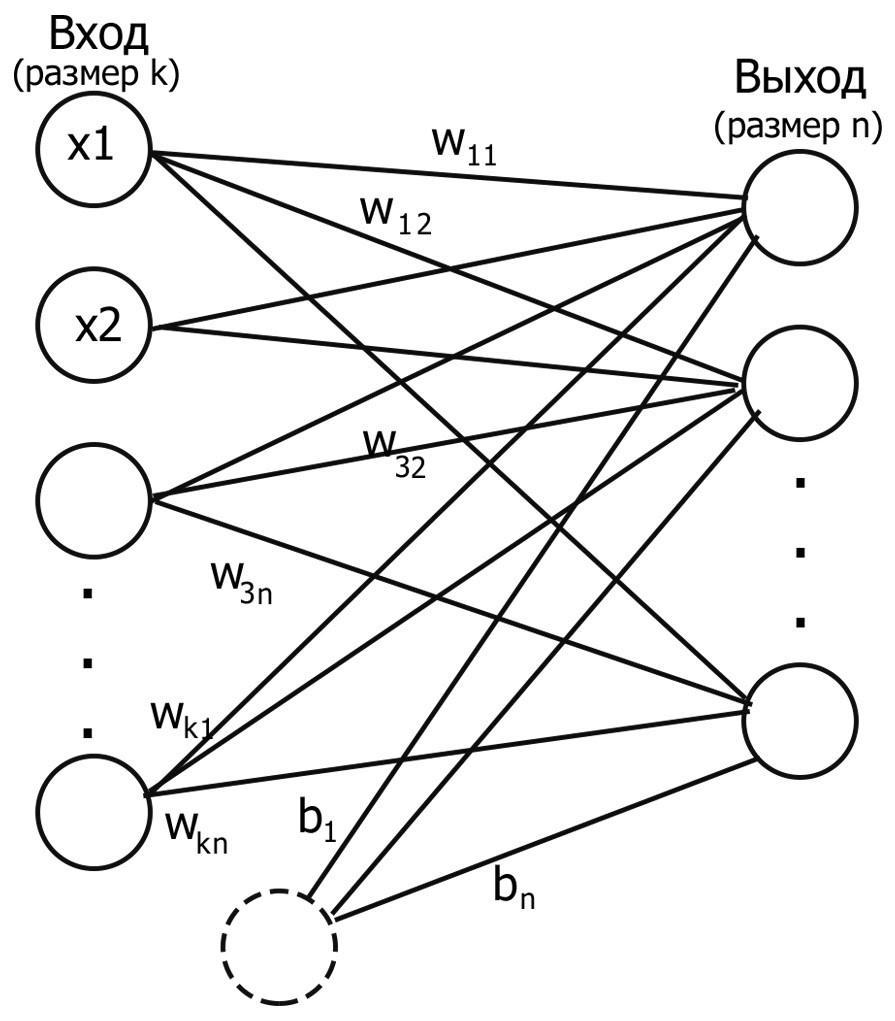

Получается, данный слой имеет  весов  плюс ещё  для параметров сдвига .

### Задание 2.1

В современных нейронных сетях полносвязные слои используются редко — максимум один на всю сеть, в конце. Как думаете, почему так происходит?  
Ответ:
- A Учитывают только значения входов, не используют порядок этих значений
- B Они строго завязаны на входной размер, нельзя менять параметры входных данных на ходу
- C Предпочитают использовать специализированные для задач слои
- D Долго работает, нельзя хорошо распараллелить

### ЛИНЕЙНЫЙ СЛОЙ В NUMPY

СКАЧАТЬ НОУТБУК: https://github.com/luhakv/cv_engr/blob/master/module3_screencast1.ipynb

Функции, которые нам понадобятся:

- _init_ для инициализации слоя соответственно его размерам;
- forward для вычисления выходного значения на этом слое;
- backward для вычисления градиента;
-clear_grad для обнуления градиента после обновления весов, так как теперь мы всё храним внутри этого класса.  

Также особое внимание мы с вами уделим функции backward_as_last_layer.

Давайте теперь создадим свою нейронную сеть из этих блоков.

В конструктор мы передадим структуру: массив с описанием размеров входных, выходных и внутренних (скрытых) слоёв.

Процесс обучения будет проходить так:

1) Прогоняем сэмпл из обучающей выборки «вперёд».

2) Сохраняем значения на каждом слое для последующего их применения в обратном проходе.

3) Производим backward (вы можете обратить внимание, что он идёт с последних слоёв к первым).

4) Считаем градиенты для обновления весов и после итерации обновления повторяем весь процесс снова.

Для визуализации прогресса мы используем библиотеку **tqdm**, которая в реальном времени будет нам показывать, на какой мы итерации, сколько ещё осталось итераций и времени, а также примерную скорость обучения.

### Задание 2.2

Почему функция потерь не достигает нуля, хоть и стремится к нему?  
Ответ: Данные неидеальны, их невозможно аппроксимировать с абсолютной точностью 

### Задание 2.3

Сколько слоёв получится в сети, если в structure задано n чисел?  
Ответ: n-1 слоёв 

### 3. Обратное распространение ошибки

### ГРАФ ВЫЧИСЛЕНИЙ

⛏ Отдельного упоминания заслуживает обратный проход с вычислением производных. Почему он идёт с конца? Почему для вычисления производных на слое  мы используем производные со слоя ? Здесь применяется механизм обратного распространения ошибки, который невозможен без понятия графа вычислений.

**Граф вычислений** — это способ представления сложной операции вычисления посредством её разбиения на более простые и понятные.

Рассмотрим пример на картинке:

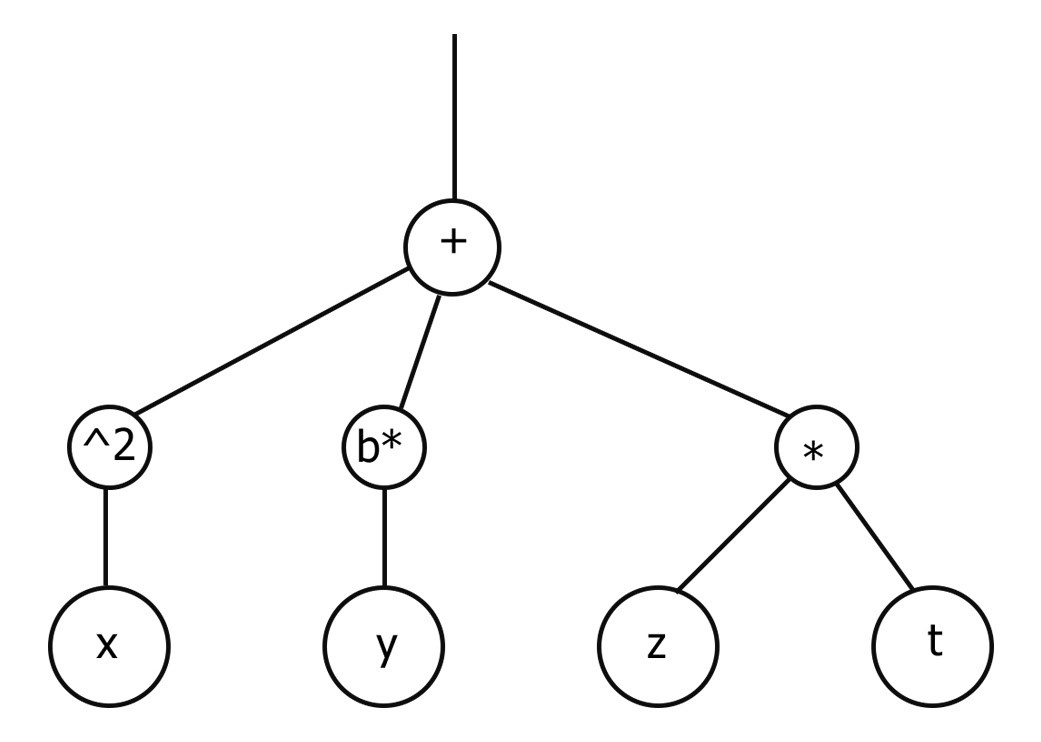

Этот граф отражает равенство:

Здесь четыре входа (, , , ) и один выход, в котором все проделанные операции суммируются.

Например, в нашей нейросети есть два скрытых слоя. Функционально мы можем это записать как композицию функций  и :

где  есть функция, эквивалентная применению слоя. Мы можем представить её в качестве графа вычислений, где на вход подаётся . Затем к нему мы применяем , а потом на вход к  мы подаём уже результат применения .

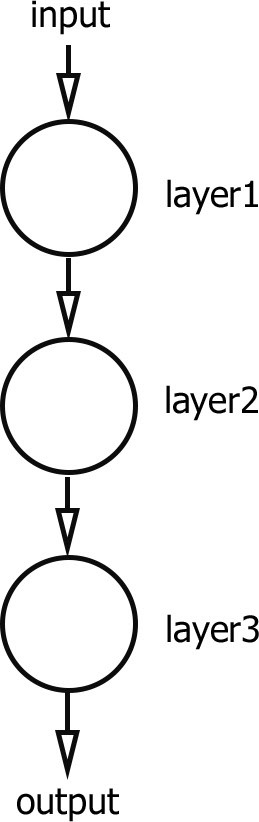

Такие структуры выглядят естественно и просто и даже могут казаться ненужными, но если мы усложним структуру сети, понять её формульный вид будет сложнее, нежели граф вычислений.

### Задание 3.1

Зачем нужен граф вычислений?  
Ответ: Он отражает порядок и связь слоёв 


### ОБРАТНОЕ РАСПРОСТРАНЕНИЕ ОШИБКИ

⛏ Итак, мы хотим узнать производную от loss-функции по весам первого слоя.

Мы можем записать всё как есть:

Затем мы можем посчитать производную — напрямую или с помощью цепного правила:

Это оказывается очень практично в нашем случае, так как для обновления весов нам нужно знать производные по всем весам, а при проходе таким образом мы вычислим их все по очереди.

Вся схема, где мы вычисляем производные с конца, называется **механизмом обратного распространения ошибки**, или **backpropagation.**

### Задание 3.2
Зачем в коде предыдущего скринкаста функция forward возвращает значения со всех слоёв?  
Ответ: Эти значения нужны для вычисления производных верно

### ПРИМЕР BACKPROPAGATION

Чтобы лучше понять принцип работы backpropagation, давайте разберём пример:

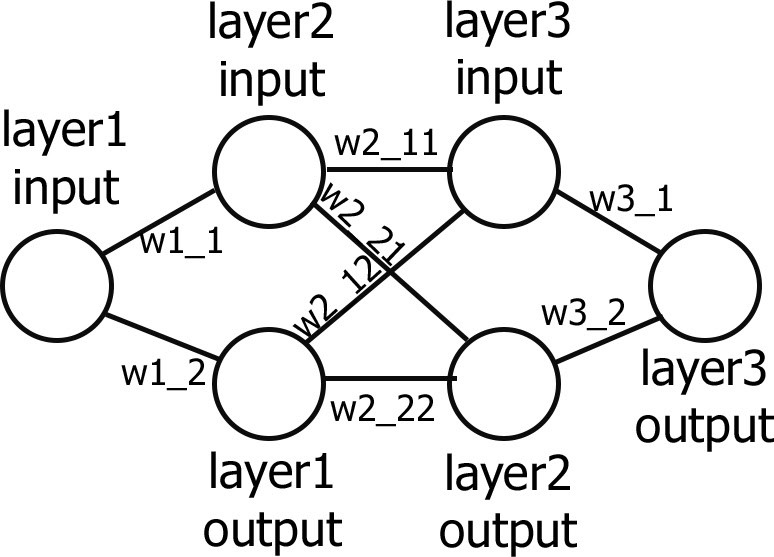

Мы имеем три линейных слоя:

- Первый с одним входом  и двумя выходами.
- Второй принимает на вход выход первого и выдаёт два числа.
- Третий принимает на вход выход второго и выдаёт одно число.  

Запишем полностью зависимость loss от , , , , а матричная запись позволит нам делать наши вычисления компактнее:

Давайте возьмём частную производную по :

Запомним эту производную и дальше будем на неё опираться.

Посчитаем производную по  в общем виде с помощью цепного правила:

Рассмотрим в общем виде производную от , , . Мы видим, что в этих производных есть очень похожие части, кроме последней производной  по . Поэтому производную по весу  мы можем посчитать с помощью производных .

Именно поэтому производную на последнем слое мы отделили от остальных, а производную для остальных слоёв мы можем вычислять итеративно, начиная с конца, при этом используя предыдущие результаты.

### 4. Функции активации

### КОГДА ЛИНЕЙНОЙ МОДЕЛИ НЕДОСТАТОЧНО

⛏ Теперь усложним задачу: сгенерируем данные, похожие на логический .

СКАЧАТЬ НОУТБУК:  https://github.com/luhakv/cv_engr/blob/master/module3_screencast2.ipynb

 и  будут числа от -1 до 1, а искомый ответ будет 0 или 1 в зависимости от того, где находится точка , или от знака произведения . Теперь это задача классификации. 

Как мы можем понять, логистическая регрессия с данной задачей уже не справится — здесь нет разделяющей прямой.

Если мы попробуем решить её с помощью нашей сети, мы увидим, что наша модель не будет справляться, сколько слоёв и нейронов в неё ни добавляй. С чем это связано? На самом деле любое количество линейных слоёв подряд можно привести к одному линейному слою с коэффициентами, которые являются композицией предыдущих. Но как нам решить задачу? На помощь приходят функции активации.

### Задание 4.1

Почему с BCE Loss ничего не получилось?  
Ответ:  Числа, передаваемые в функцию потерь, ничем не ограничены, а BCE ожидает числа в диапазоне  [0,1]


### Задание 4.2

Какую точность можно ожидать от линейной модели на XOR-выборке?  
Ответ: Примерно до 63% верно

### ФУНКЦИИ АКТИВАЦИИ


Функции активации добавят в нашу сеть нелинейности. Они так называются, потому что по сути они активируются на определённые сигналы, например функция ReLU.

Часто применяемая в нейронных сетях, функция ReLU активируется, когда ей приходит положительный сигнал, а сигнал со знаком минус она приравнивает к нулю.

Функции активации ставят после слоёв, тем самым усложняя получаемый результат: теперь вместо линейных преобразований и разделяющих прямых (плоскостей) мы получаем экспоненциальные, логарифмические, ступенчатые и т. д.

Давайте модифицируем код нашей сети и добавим каждому слою функцию активации, например сигмоиду.

Теперь за  будет обозначаться выход со слоя после применения активационной функции, а за  — выход только слоя.


Это усложняет наши вычисления для обратного распространения, но зато прибавляет вычислительной точности.

Давайте рассмотрим, как теперь выглядит производная с учётом того, что теперь есть  и :

В целом стало больше множителей, но сильно нам это жизнь не усложнило. В следующем блоке модуля мы применим это на практике.

### ФУНКЦИЯ АКТИВАЦИИ SOFTMAX

Вы уже рассмотрели множество функций активации в других модулях, но есть ещё одна, которая специфична для случая многоклассовой классификации, — SoftMax.

Допустим, сеть возвращает  чисел. Каждое из них отвечает за то, что перед нами конкретный класс. Эти числа могут быть любыми: отрицательными, положительными, большими и маленькими. Наша функция поможет интерпретировать их как вероятности для каждого класса, более того — она сделает их согласованными, то есть сумма всех вероятностей будет равна единице (для этого мы делим получившееся значение на сумму всех значений для  чисел).



### ФУНКЦИИ АКТИВАЦИИ В NUMPY

СКАЧАТЬ НОУТБУК: 

Теперь мы знаем, что для решения нелинейных задач нужны функции активации.

Модифицируем класс линейного слоя так, чтобы он работал с учётом функций активации и их производных. Изменениям подвергнутся функции forward, backward и __init__, где мы добавляем каждому слою функцию активации. 

Мы применяем то, что у нас получилось, и обучаем сеть с использованием уже знакомых нам функций потерь.

Мы видим, что с использованием функций активации наша модель легко справляется с нелинейными данными.

### Задание 4.4

Почему последний эксперимент с регрессией на линейных данных не получился?  
Ответ: На выходе сети стояла сигмоида — она ограничила выход сети до диапазона [0,1] 